Instalamos la libreria para posyerior importar y que agarre la logica difusa


In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9150b3e08fa250a0ce5bb6dae559682fb856e1fe245c82a7583336b4507b70c2
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Importamos lo que necesitaremos, como lo es el numerico para python y el fuzzy logic

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [67]:
# Definir las variables del sistema
calidad_comida = ctrl.Antecedent(np.arange(0, 11, 1), 'Calidad de Comida')
calidad_servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'Calidad del Servicio')
satisfaccion = ctrl.Consequent(np.arange(0, 101, 1), 'Satisfactorio')

In [76]:
# Definir las funciones de membresía
calidad_comida['mala'] = fuzz.trimf(calidad_comida.universe, [0, 0, 5])
calidad_comida['promedio'] = fuzz.trimf(calidad_comida.universe, [0, 5, 10])
calidad_comida['excelente'] = fuzz.trimf(calidad_comida.universe, [5, 10, 10])

calidad_servicio['malo'] = fuzz.trimf(calidad_servicio.universe, [0, 0, 5])
calidad_servicio['regular'] = fuzz.trimf(calidad_servicio.universe, [0, 5, 10])
calidad_servicio['excelente'] = fuzz.trimf(calidad_servicio.universe, [5, 10, 10])

satisfaccion['baja'] = fuzz.trimf(satisfaccion.universe, [0, 0, 50])
satisfaccion['media'] = fuzz.trimf(satisfaccion.universe, [25, 50, 75])
satisfaccion['alta'] = fuzz.trimf(satisfaccion.universe, [50, 100, 100])


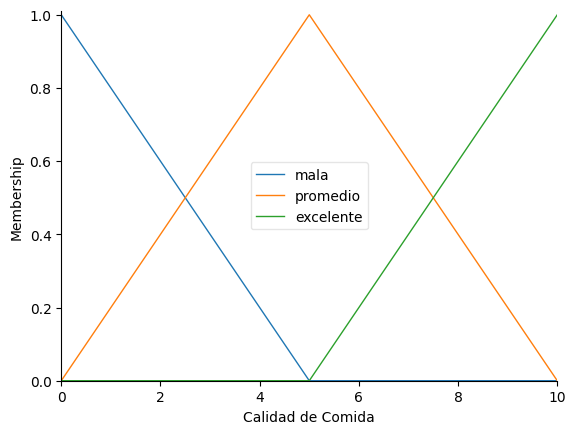

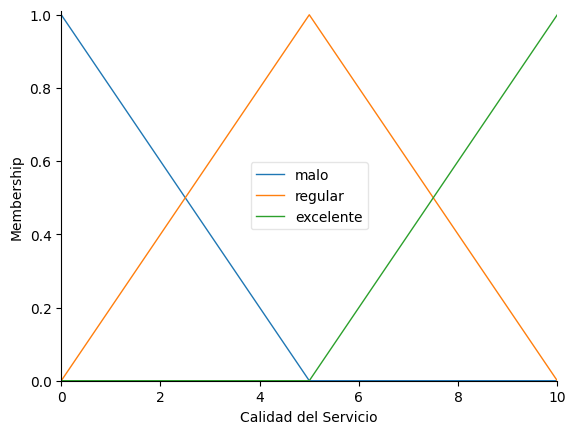

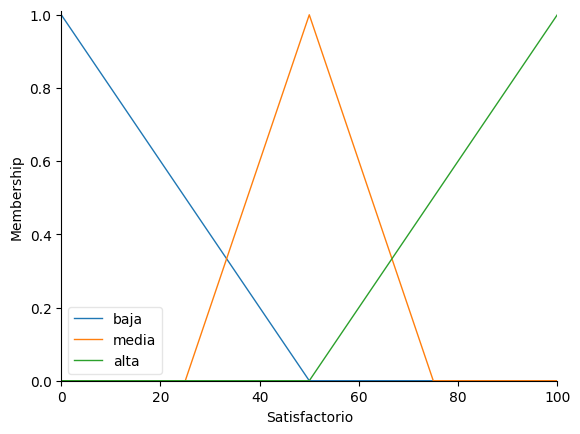

In [77]:
# Visualizar las funciones de membresía
calidad_comida.view()
calidad_servicio.view()
satisfaccion.view()

In [79]:
# Definir las reglas
regla1 = ctrl.Rule(calidad_comida['mala'] | calidad_servicio['malo'], satisfaccion['baja'])
regla2 = ctrl.Rule(calidad_comida['promedio'] & calidad_servicio['regular'], satisfaccion['media'])
regla3 = ctrl.Rule(calidad_comida['excelente'] | calidad_servicio['excelente'], satisfaccion['alta'])


In [80]:
# Crear el sistema de control
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3])
controlador = ctrl.ControlSystemSimulation(sistema_control)

In [81]:
# Simular el sistema con una calidad de comida y servicio de entrada
controlador.input['Calidad de Comida'] = 8
controlador.input['Calidad del Servicio'] = 7

In [82]:
# Obtener el resultado
controlador.compute()

Nivel de satisfacción del cliente: 68.33861144945182


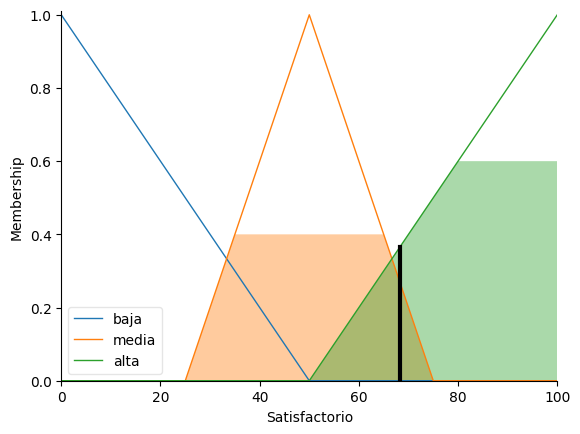

In [83]:
# Visualizar el resultado
print("Nivel de satisfacción del cliente:", controlador.output['Satisfactorio'])
satisfaccion.view(sim=controlador)